# DSC 540 Week 9-10 Activities

Logan Quandt

In [94]:
import re
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ssl
import requests
import urllib.request, urllib.parse, urllib.error
import json
import os

# Data Wrangling with Python: Activity 9

In [95]:
#check SSL cert and ignore SSL errors
cert_ssl = ssl.create_default_context()
cert_ssl.check_hostname = False
cert_ssl.verify_mode = ssl.CERT_NONE

In [96]:
#create url and read HTML using requests
top100 = "https://www.gutenberg.org/browse/scores/top"
response = requests.get(top100)

In [97]:
#create function to check status of connection
def status_check(r):
    if r.status_code==200:
        print("Request successful.")
        return 1
    else:
        print('Request failed.')
        return -1

In [98]:
#check status
status = status_check(response)
print(status)

Request successful.
1


In [99]:
#deode the response and pass it on to BeautifulSoup for HTML parsing
contents = response.content.decode(response.encoding)
soup = BeautifulSoup(contents, 'html.parser')

Find all the href tags and store them in the list of links

In [100]:
#Find all href tags and store them in list of links
href_list = []
for link in soup.find_all('a'):
    href_list.append(link.get('href'))
print(href_list[0:30]) #print first 30 elements

['/', '/about/', '/about/', '/policy/collection_development.html', '/about/contact_information.html', '/about/background/', '/policy/permission.html', '/policy/privacy_policy.html', '/policy/terms_of_use.html', '/ebooks/', '/ebooks/', '/ebooks/bookshelf/', '/browse/scores/top', '/ebooks/offline_catalogs.html', '/help/', '/help/', '/help/copyright.html', '/help/errata.html', '/help/file_formats.html', '/help/faq.html', '/policy/', '/help/public_domain_ebook_submission.html', '/help/submitting_your_own_work.html', '/help/mobile.html', '/attic/', '/donate/', '/donate/', '#books-last1', '#authors-last1', '#books-last7']


In [101]:
#print out href list
for i, item in enumerate(href_list):
    print(i, item)

0 /
1 /about/
2 /about/
3 /policy/collection_development.html
4 /about/contact_information.html
5 /about/background/
6 /policy/permission.html
7 /policy/privacy_policy.html
8 /policy/terms_of_use.html
9 /ebooks/
10 /ebooks/
11 /ebooks/bookshelf/
12 /browse/scores/top
13 /ebooks/offline_catalogs.html
14 /help/
15 /help/
16 /help/copyright.html
17 /help/errata.html
18 /help/file_formats.html
19 /help/faq.html
20 /policy/
21 /help/public_domain_ebook_submission.html
22 /help/submitting_your_own_work.html
23 /help/mobile.html
24 /attic/
25 /donate/
26 /donate/
27 #books-last1
28 #authors-last1
29 #books-last7
30 #authors-last7
31 #books-last30
32 #authors-last30
33 /ebooks/1342
34 /ebooks/68137
35 /ebooks/11
36 /ebooks/84
37 /ebooks/1661
38 /ebooks/68134
39 /ebooks/20228
40 /ebooks/2701
41 /ebooks/345
42 /ebooks/98
43 /ebooks/174
44 /ebooks/64317
45 /ebooks/4300
46 /ebooks/68133
47 /ebooks/1952
48 /ebooks/32449
49 /ebooks/43
50 /ebooks/2600
51 /ebooks/1400
52 /ebooks/68135
53 /ebooks/1260


In [102]:
#create empty list and iterate over range 33:133 as this is where books start
book_num = []
for i in range(33,133):
    link = links_list[i]
    link = link.strip()
    n=re.findall('[0-9]+', link) #regex to find all numeric digits
    book_num.append(int(n[0]))

                        
print('File #s for Top100 Books:', book_num)
print(len(book_num)) #print to ensure I picked up 100 books

File #s for Top100 Books: [1342, 68137, 11, 84, 1661, 68134, 20228, 2701, 345, 98, 174, 64317, 4300, 68133, 1952, 32449, 43, 2600, 1400, 68135, 1260, 1080, 35899, 1184, 2554, 1232, 2591, 30254, 2542, 47629, 5740, 76, 45, 5200, 74, 6130, 219, 844, 46, 514, 120, 55, 158, 1727, 135, 28054, 27827, 10623, 2852, 58585, 68140, 2814, 25344, 1497, 996, 4363, 35, 16, 766, 68136, 730, 768, 67098, 10676, 205, 1399, 244, 1998, 63256, 36, 10, 3600, 2500, 236, 4980, 203, 68141, 2680, 3206, 2148, 68122, 829, 24518, 600, 8800, 3207, 160, 10007, 3825, 161, 68127, 43453, 408, 113, 41, 863, 8492, 521, 31284, 68129]
100


In [103]:
#printing first 2000 characters of soup.text
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2022-05-21134032
last 7 days1067660
last 30 days4882328



Top 100 EBooks yesterd

In [104]:
#create empty list, set starting_index and create list of books using splitlines
e_books = []
starting_index = soup.text.splitlines().index('Top 100 EBooks yesterday')+8

for i in range(101):
    e_books.append(soup.text.splitlines()[starting_index+i])

In [105]:
#create empty list and strip titles using regex for just book name
hundred_top_ebooks = []

for i in range(100):
    start, stop = re.match('^[a-zA-Z ]*', e_books[i]).span()
    hundred_top_ebooks.append(e_books[i][start:stop])

In [106]:
#print top 100 books
for book in hundred_top_ebooks:
    print(book)

Top 

Pride and Prejudice by Jane Austen 
The cake and biscuit book by Elizabeth Douglas 
Alice
Frankenstein
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
The book of Earth by Alfred Noyes 
Noli Me Tangere by Jos
Moby Dick
Dracula by Bram Stoker 
A Tale of Two Cities by Charles Dickens 
The Picture of Dorian Gray by Oscar Wilde 
The Great Gatsby by F
Ulysses by James Joyce 
The history of the proceedings in the case of Margaret
The Yellow Wallpaper by Charlotte Perkins Gilman 
Japanese Girls and Women by Alice Mabel Bacon 
The Strange Case of Dr
War and Peace by graf Leo Tolstoy 
Great Expectations by Charles Dickens 
Flower o
Jane Eyre
A Modest Proposal by Jonathan Swift 
The Philippines a Century Hence by Jos
The Count of Monte Cristo
Crime and Punishment by Fyodor Dostoyevsky 
The Prince by Niccol
Grimms
The Romance of Lust
A Doll
Ang 
Tractatus Logico
Adventures of Huckleberry Finn by Mark Twain 
Anne of Green Gables by L
Metamorphosis by Franz Kafka 
The Adventures of T

# Activity 10

In [107]:
#load in API key from saved json file 
with open ('APIKeys.json') as f:
    keys = json.load(f)
    omdbapi=keys['OMDBapi']

In [108]:
#set url and api key
serviceurl = "http://www.omdbapi.com/?"
key = "&apikey="+omdbapi

In [109]:
#create function to print the JSON data
def print_json(json_data):
    list_keys = ['Title', "Year", "Rated", "Released", "Runtime",'Genre','Director','Writer',
                "Actors", "Plot", "Language", "Country", "Awards", "Ratings", "Metascore", 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print('-'*50)

In [110]:
#create function to save movie posters
def save_poster(json_data):
    title = json_data['Title']
    poster_url = json_data['Poster']
    poster_file_extension = poster_url.split('.')[-1]
    poster_data = urllib.request.urlopen(poster_url).read()
    savelocation = os.getcwd()+'\\'+'Posters'+'\\'
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
        
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [111]:
#create function to search OMBD for movie and save poster
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+key
        print(f'Retrieving the data of "{title}" now...')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            if json_data['Poster']!="N/A":
                save_poster(json_data)
        else:
            print('Error encountered:', json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [112]:
#search for titanic
search_movie('Titanic')

Retrieving the data of "Titanic" now...
http://www.omdbapi.com/?t=Titanic&apikey=d9cded0f
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 125 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '87%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,131,404
imdbID: tt0120338
--------------------------------------------------


In [113]:
#search for random error
search_movie('Random_error')

Retrieving the data of "Random_error" now...
http://www.omdbapi.com/?t=Random_error&apikey=d9cded0f
Error encountered: Movie not found!


# Connect to the Twitter API and do a simple data pull

In [114]:
import twitter

In [115]:
#setup twitter API
api = twitter.Api(consumer_key = 'VAWCUfOT9OYe4JB4Xa1csbkks', consumer_secret = "AHKJbE3OEAWLJ49S6EZXsZcP0MH3E0BUB8ZOAdTyi3Ta4jvUO6",
                 access_token_key = "2917028408-7rDR3tgFaJ3730FY2ELmEboLm2DxVwGfDQioCxW",
                 access_token_secret = 'rSZZeUTqQGgtuFMZ369IUhjsnTTpXXBOuvxk5aRisEyB2')

In [116]:
#verify api credientials
print(api.VerifyCredentials())

{"created_at": "Wed Dec 03 00:26:30 +0000 2014", "default_profile": true, "description": "UNO 21", "favourites_count": 3466, "followers_count": 406, "friends_count": 352, "geo_enabled": true, "id": 2917028408, "id_str": "2917028408", "name": "Logan Quandt", "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_banner_url": "https://pbs.twimg.com/profile_banners/2917028408/1530917329", "profile_image_url": "http://pbs.twimg.com/profile_images/1187147411887656961/ot3nkxdi_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1187147411887656961/ot3nkxdi_normal.jpg", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "protected": true, "screen_name": "quandtlogan", "sta

In [117]:
#use twitter api to search for Bellevue University
api.GetSearch(term='Bellevue University', since=2021-11-21, count=10)

[Status(ID=1528502775004504067, ScreenName=crishm, Created=Sun May 22 22:27:14 +0000 2022, Text='RT @Bellevue_Times: Among the graduates will be student speaker Ashlea Rodriguez - an #airforce #veteran, a #mother, a working adult learne…'),
 Status(ID=1528452008969125891, ScreenName=Bellevue_Times, Created=Sun May 22 19:05:30 +0000 2022, Text='Among the graduates will be student speaker Ashlea Rodriguez - an #airforce #veteran, a #mother, a working adult le… https://t.co/LoRXhtsYIe'),
 Status(ID=1528383701385564161, ScreenName=mykidscome1st, Created=Sun May 22 14:34:05 +0000 2022, Text='RT @MarcusClapp: 🚨Commitment Alert 🚨    \n\nCongrats to Hawks OF @FogelstromH on his commitment to Bellevue University. The Bruins are gettin…'),
 Status(ID=1527917475547185152, ScreenName=ShirleyNicole26, Created=Sat May 21 07:41:28 +0000 2022, Text='BIOL 125 Survey of Human Diseases, Bellevue University Assignment Help Service -\n\n#BIOL125 #SurveyofHumanDiseases… https://t.co/JdrGJ6f8jm'),
 Status(ID

In [118]:
#use twitter api to search for term data science
api.GetSearch(term='Data Science', since=2021-11-21, count=10)

[Status(ID=1528233891668041728, ScreenName=KirkDBorne, Created=Sun May 22 04:38:47 +0000 2022, Text='[Free PDF Download] Introduction to #Probability for Data Science: https://t.co/L51j3udY5j by @stanley_h_chan \n————… https://t.co/DuBBEmHn7e'),
 Status(ID=1528282989184315393, ScreenName=ndtvindia, Created=Sun May 22 07:53:53 +0000 2022, Text='73km प्रति सेकंड की स्पीड से फैल रहा यूनिवर्स! NASA बोला- "कुछ तो गड़बड़ है"\nhttps://t.co/gbxvJ1xFyQ'),
 Status(ID=1528299671877197829, ScreenName=USEmbassyKenya, Created=Sun May 22 09:00:10 +0000 2022, Text='Well done Captain Jamal Hassan who was conferred with a Masters in Data Science and Analytics from @UofOklahoma. Ca… https://t.co/Cip0kw5jE2'),
 Status(ID=1528583194353598465, ScreenName=patilsushant001, Created=Mon May 23 03:46:47 +0000 2022, Text='RT @prthgo: 21 YouTube channels from which you can learn Python, Machine Learning, Deep Learning, Data Science  &amp; much much more.'),
 Status(ID=1528583102309728256, ScreenName=3novices, Crea

# Complete 3 visualizations

In [119]:
#load in dataframe
insurance_df = pd.read_csv('insurance.csv')

In [120]:
#ensure dataframe loaded correctly
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


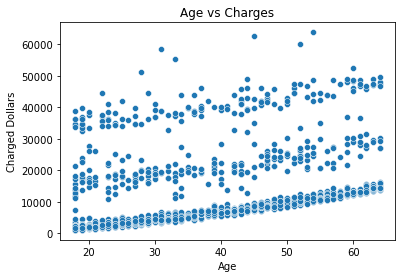

In [121]:
#import seaborn and create scatterplot of age vs charges
import seaborn as sns
sns.scatterplot(data = insurance_df, x = 'age', y= 'charges')
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel("Charged Dollars")
plt.show()

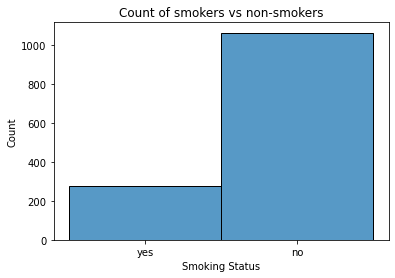

In [122]:
#create histogram
sns.histplot(data = insurance_df, x='smoker')
plt.title("Count of smokers vs non-smokers")
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

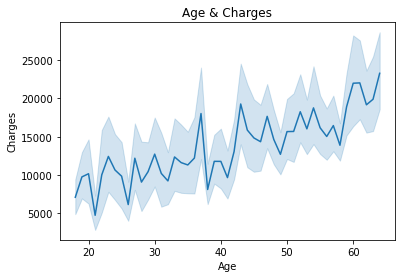

In [123]:
#create lineplot
sns.lineplot(data = insurance_df, x='age', y='charges')
plt.title("Age & Charges")
plt.xlabel("Age")
plt.ylabel('Charges')
plt.show()